https://www.kaggle.com/c/boston-housing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./dataset/boston_housing/train.csv')
test = pd.read_csv('./dataset/boston_housing/test.csv')
train['source'] = 'train'
test['source'] = 'test'

In [4]:
data = pd.concat([train,test],ignore_index=True)
print train.shape
print test.shape
print data.shape

(333, 16)
(173, 15)
(506, 16)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
ID         506 non-null int64
age        506 non-null float64
black      506 non-null float64
chas       506 non-null int64
crim       506 non-null float64
dis        506 non-null float64
indus      506 non-null float64
lstat      506 non-null float64
medv       333 non-null float64
nox        506 non-null float64
ptratio    506 non-null float64
rad        506 non-null int64
rm         506 non-null float64
source     506 non-null object
tax        506 non-null int64
zn         506 non-null float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.3+ KB


In [6]:
data.describe()

,ID,age,black,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,333.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,68.574901,356.674032,0.069170,3.613524,3.795043,11.136779,12.653063,22.768769,0.554695,18.455534,9.549407,6.284634,408.237154,11.363636
std,146.213884,28.148861,91.294864,0.253994,8.601545,2.105710,6.860353,7.141062,9.173468,0.115878,2.164946,8.707259,0.702617,168.537116,23.322453
min,1.000000,2.900000,0.320000,0.000000,0.006320,1.129600,0.460000,1.730000,5.000000,0.385000,12.600000,1.000000,3.561000,187.000000,0.000000
25%,127.250000,45.025000,375.377500,0.000000,0.082045,2.100175,5.190000,6.950000,17.400000,0.449000,17.400000,4.000000,5.885500,279.000000,0.000000
50%,253.500000,77.500000,391.440000,0.000000,0.256510,3.207450,9.690000,11.360000,21.600000,0.538000,19.050000,5.000000,6.208500,330.000000,0.000000
75%,379.750000,94.075000,396.225000,0.000000,3.677082,5.188425,18.100000,16.955000,25.000000,0.624000,20.200000,24.000000,6.623500,666.000000,12.500000
max,506.000000,100.000000,396.900000,1.000000,88.976200,12.126500,27.740000,37.970000,50.000000,0.871000,22.000000,24.000000,8.780000,711.000000,100.000000


In [7]:
data.head()

,ID,age,black,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,source,tax,zn
0,1,65.2,396.90,0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1,6.575,train,296,18.0
1,2,78.9,396.90,0,0.02731,4.9671,7.07,9.14,21.6,0.469,17.8,2,6.421,train,242,0.0
2,4,45.8,394.63,0,0.03237,6.0622,2.18,2.94,33.4,0.458,18.7,3,6.998,train,222,0.0
3,5,54.2,396.90,0,0.06905,6.0622,2.18,5.33,36.2,0.458,18.7,3,7.147,train,222,0.0
4,7,66.6,395.60,0,0.08829,5.5605,7.87,12.43,22.9,0.524,15.2,5,6.012,train,311,12.5


In [11]:
train = data[data['source']=='train']
test = data[data['source']=='test']

In [13]:
# baseline model
mean_values = train['medv'].mean()
base1 = test.loc[:,['ID']]
base1['medv'] = mean_values
base1.to_csv('./dataset/boston_housing/result_0.csv',index=False)

In [23]:
target = 'medv'
IDcol =['ID']
from sklearn import metrics
from sklearn import model_selection
def modelfit(alg,dtrain,dtest,predictors,target,IDcol,filename):
    alg.fit(dtrain[predictors],dtrain[target])
    dtrain_predicted = alg.predict(dtrain[predictors])
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_score = model_selection.cross_val_score(alg,dtrain[predictors],dtrain[target],cv=kfold,scoring = 'mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    print '\nModel Report - %s' %alg
    
    print 'RMSE : %.4g' % np.sqrt(metrics.mean_squared_error(dtrain[target].values,dtrain_predicted))
    print "CV Score : Mean - %.4g    |    Std - %.4g   |   Min - %.4g   |   Max - %.4g   " %(np.mean(cv_score), np.std(cv_score), np.min(cv_score),np.max(cv_score))
    predicted = alg.predict(dtest[predictors])
    result = test.loc[:,IDcol]
    result[target] = predicted 
    result.to_csv(filename,index=False)

In [18]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['source','medv'],axis=1,inplace=True)
predictors = [x for x in train.columns if x not in IDcol + [target]]

C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was rename


Model Report - LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
RMSE : 4.732
CV Score : Mean - 5.744    |    Std - 3.28   |   Min - 2.722   |   Max - 14.48   


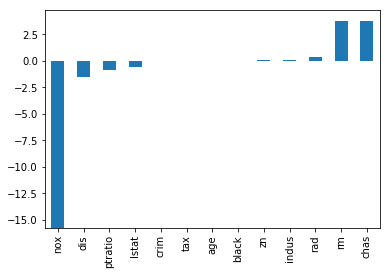

In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression(normalize = True)
modelfit(alg1,train,test,predictors,target,IDcol,'./dataset/boston_housing/result_1.csv')
coef1 = pd.Series(alg1.coef_,predictors).sort_values()
coef1.plot(kind='bar')

C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was rename


Model Report - Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)
RMSE : 4.766
CV Score : Mean - 5.537    |    Std - 3.205   |   Min - 2.624   |   Max - 13.97   


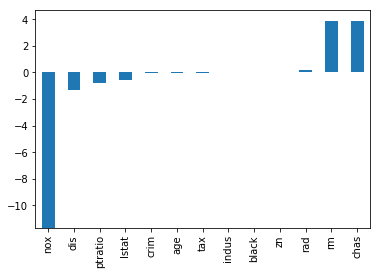

In [26]:
# Ridge
from sklearn.linear_model import Ridge
alg2 = Ridge(alpha=.05,normalize = True)
modelfit(alg2,train,test,predictors,target,IDcol,'./dataset/boston_housing/result_2.csv')
coef2 = pd.Series(alg2.coef_,predictors).sort_values()
coef2.plot(kind='bar')

C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was rename


Model Report - DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=25, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
RMSE : 4.598
CV Score : Mean - 5.226    |    Std - 1.524   |   Min - 2.962   |   Max - 8.854   


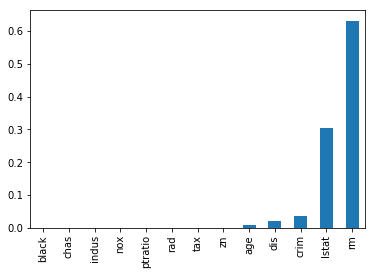

In [46]:
# Decission Tree
from sklearn.tree import DecisionTreeRegressor
alg3 = DecisionTreeRegressor(max_depth=20,min_samples_leaf = 25)
modelfit(alg3,train,test,predictors,target,IDcol,'./dataset/boston_housing/result_3.csv')
coef3 = pd.Series(alg3.feature_importances_,predictors).sort_values()
coef3.plot(kind='bar')


Model Report - DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
RMSE : 3.343
CV Score : Mean - 4.566    |    Std - 1.996   |   Min - 2.452   |   Max - 9.622   


C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was rename

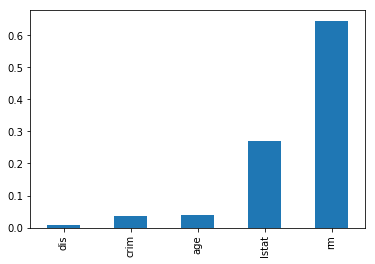

In [54]:
# Decission Tree
from sklearn.tree import DecisionTreeRegressor
predictors = ['rm','lstat','crim','dis','age']
alg3 = DecisionTreeRegressor(max_depth=15,min_samples_leaf = 10)
modelfit(alg3,train,test,predictors,target,IDcol,'./dataset/boston_housing/result_3.csv')
coef3 = pd.Series(alg3.feature_importances_,predictors).sort_values()
coef3.plot(kind='bar')

C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was rename


Model Report - RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=8, n_jobs=2, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
RMSE : 4.325
CV Score : Mean - 5.111    |    Std - 1.904   |   Min - 2.676   |   Max - 9.872   


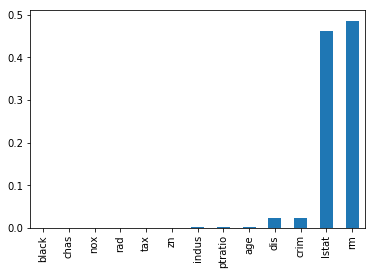

In [60]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=8,max_depth=5, min_samples_leaf =20,n_jobs = 2)
modelfit(alg5,train,test,predictors,target,IDcol,'./dataset/boston_housing/result_5.csv')
coef5 = pd.Series(alg5.feature_importances_,predictors).sort_values()
coef5.plot(kind='bar')
